In [1]:
import matplotlib as mpl
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics
import glob, os
%matplotlib inline

In [2]:
data = [['jicofo', 152, 110, 20], ['pdfbox', 121175, 57563, 13851], ['broadleaf', 372, 372, 158]]
df = pd.DataFrame(data, columns = ['project', 'total invocations', 'collected object profiles', 'unique object profiles'])
color_list = ['#f5b935', '#df3062', '#11abc1']

df

,project,total invocations,collected object profiles,unique object profiles
0,jicofo,152,110,20
1,pdfbox,121175,57563,13851
2,broadleaf,372,372,158


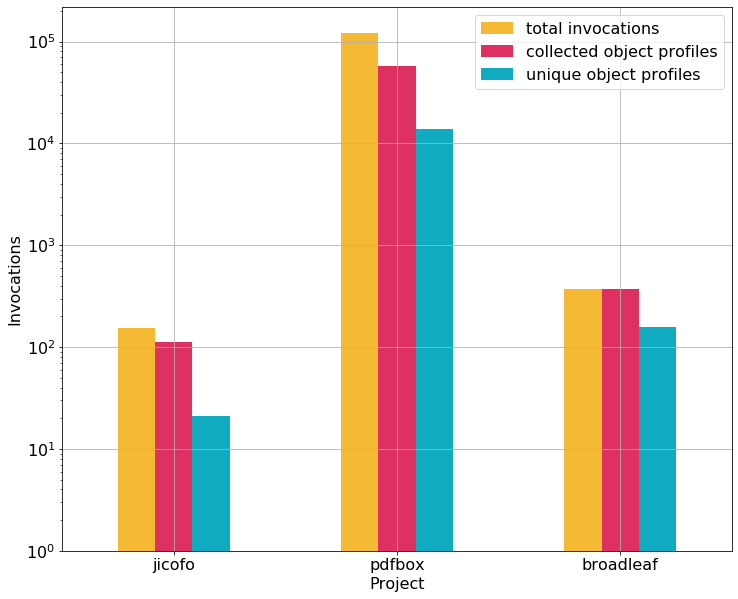

In [3]:
fig = df.set_index('project').plot.bar(color=color_list, log=True, figsize=(12, 10), grid=True, fontsize=16, rot=0)
fig.set_xlabel('Project', fontdict={'fontsize':16})
fig.set_ylabel('Invocations', fontdict={'fontsize':16})
fig.legend(loc=1,fontsize=16);
# fig.set_title("Method invocations and object profiles for each project", fontsize=16)
plt.savefig('/home/user/invocations.pdf')

In [4]:
paths = []
os.chdir("/tmp/pankti-object-data/")
for path in glob.glob("*-object-profile-sizes.txt"):
    paths.append(path)

print(len(paths))

46


In [5]:
sizes_in_file = ""
sizes = []
total_size = 0
for path in paths:
    f = open(path, "r")
    sizes_in_file = f.read().rstrip()
    for s in sizes_in_file.split("\n"):
        total_size += int(s)
        sizes.append(float(s)/(1024 * 1024))
        
print("Total size (GB)", total_size/(1024 * 1024 * 1024))

Total size (GB) 5.493391048163176


In [6]:
sizes.sort()
print("Smallest object profile (MB):", sizes[0])
print("Largest object profile (MB):", sizes[-1])
print("Median size of object profile (MB):", statistics.median(sizes))

Smallest object profile (MB): 0.0001506805419921875
Largest object profile (MB): 54.727248191833496
Median size of object profile (MB): 0.0001506805419921875


In [7]:
sorted_unique_sizes = list(set(sizes))
sorted_unique_sizes.sort()
df = pd.DataFrame(sizes)
print(df.shape)
df.head()

(57563, 1)


,0
0,0.000151
1,0.000151
2,0.000151
3,0.000151
4,0.000151


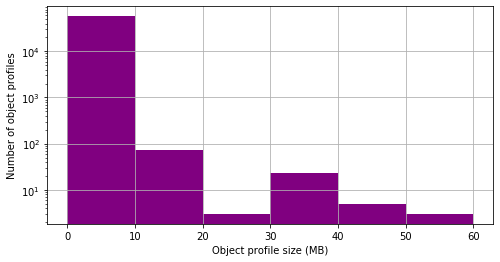

In [8]:
size_series = pd.Series(sizes)
bins = np.linspace(0, 60, 7)
fig, ax = plt.subplots()
size_hist = size_series.hist(bins=bins, ax=ax, figsize=(8, 4), log=True, color="#800080")
size_hist.set_xlabel("Object profile size (MB)")
size_hist.set_ylabel("Number of object profiles")
fig.savefig('/home/user/pdfbox-object-sizes.pdf')

#3b55ce